#Лабораторная работа #4

Реализовать и протестировать на разных матрицах метод вращений Якоби для поиска собственных значений

#Sandbox

In [ ]:
import numpy as np
import math as mt

In [ ]:
def rotate(A, P, k, l):
    n = len(A)
    d = A[l, l] - A[k, k]

    if abs(A[k, l]) < abs(d) * 1.0e-36:
        t = A[k, l] / d
    else:
        phi = d / (2* A[k, l])
        t = 1/ (abs(phi) + mt.sqrt(1 + phi ** 2))
        if phi < 0.:
            t = -t
    c = 1 / mt.sqrt(1 + t ** 2)
    s = t * c
    tau = s / (1 + c)

    tt = A[k, l]
    A[k, l] = 0.
    A[k, k] = A[k, k] - t*tt
    A[l, l] = A[l, l] + t*tt
     
    for i in range(k):
        tt = A[i, k]
        A[i, k] = tt - s * (A[i, l] + tau * tt)
        A[i, l] = A[i, l] + s * (tt - tau * A[i, l])

    for i in range(k + 1, l):
        tt = A[k, i]
        A[k, i] = tt - s * (A[i, l] + tau * A[k, i])
        A[i, l] = A[i, l] + s * (tt - tau * A[i, l])

    for i in range(l + 1, n):
        tt = A[k, i]
        A[k, i] = tt - s * (A[l, i] + tau * tt)
        A[l, i] = A[l, i] + s * (tt - tau * A[l, i])

    for i in range(n):
        tt = P[i, k]
        P[i, k] = tt - s * (P[i, l] + tau * P[i, k])
        P[i, l] = P[i, l] + s * (tt - tau * P[i, l])

    return A, P


In [ ]:
def elem_max(A):
    n, k, l = len(A), 0, 0
    aMax = A[k, l]
    for i in range(n-1):
        for j in range(i+1, n):
            if abs(A[i, j]) >= aMax:
                aMax = abs(A[i, j])
                k, l = i, j
    return aMax, k, l

In [ ]:
def jacobi(A, tol = 1e-3):
    n = len(A)
    rotMax = 5 * (n ** 2)
    P = np.identity(n)
    for i in range(rotMax):
        aMax, k, l = elem_max(A)
        #print(i, A, "\n", np.diag(A), "\n")
        if aMax < tol:
            print(f"Jacobi method converges with {i} iterations")
            return np.diag(A), P
        A, P = rotate(A, P, k, l)
    print(f"Jacobi method didn't converge with {rotMax} iterations")
    return None, None

In [ ]:
n = 8
A = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i < j:
            A[i, j] = (i + 1) / (j + 1)
        else:
            A[i, j] = (j + 1) / (i + 1)
lam, x = jacobi(A)
lam

Jacobi method converges with 56 iterations


array([-0.11311388,  1.27638828,  0.28872333,  0.53450768,  0.12605225,
        0.18407442,  0.08707598,  4.61629194])

#Sandbox

In [ ]:
x = []
c = []
for n in range(1, 100, 5):
    counter = 0
    A = generate_hilbert_matrix(n)
    a, b, iter = jacobi(A)
    c.append(counter)
    x.append(iter)

Jacobi method converges with 1 iterations
Jacobi method converges with 21 iterations
Jacobi method converges with 48 iterations
Jacobi method converges with 73 iterations
Jacobi method converges with 107 iterations
Jacobi method converges with 132 iterations
Jacobi method converges with 164 iterations
Jacobi method converges with 191 iterations
Jacobi method converges with 219 iterations
Jacobi method converges with 246 iterations
Jacobi method converges with 268 iterations
Jacobi method converges with 294 iterations
Jacobi method converges with 320 iterations
Jacobi method converges with 348 iterations
Jacobi method converges with 386 iterations
Jacobi method converges with 415 iterations
Jacobi method converges with 441 iterations
Jacobi method converges with 465 iterations
Jacobi method converges with 494 iterations
Jacobi method converges with 521 iterations


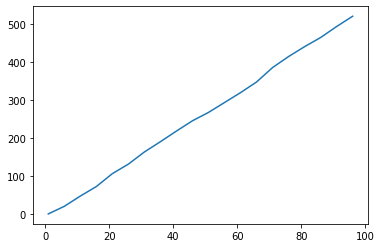

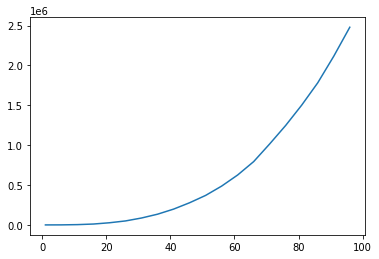

In [ ]:
plt.plot(list(range(1, 100, 5)), x)
plt.show()
plt.plot(list(range(1, 100, 5)), c)
plt.show()

#Generators

In [ ]:
import numpy as np
import math as mt
import os
import scipy.sparse
import matplotlib.pyplot as plt
import random


def empty_matrix(n, m, format):
    Matrix = scipy.sparse.__dict__[format + "_matrix"]
    return Matrix((n, m))

def identity_matrix(n, format):
    return scipy.sparse.identity(n, format=format)

def ascending_vector(n):
    return np.array(list(range(1, n + 1)))

def generate_big_matrix(n, p, format):
    return scipy.sparse.random(n, n, p, format=format)

def random_vector(n):
    return ascending_vector(n)

In [ ]:
def generate_pre_matrix(n):
    A = empty_matrix(n, n, "lil")
    for i in range(n):
        for j in range(i, n):
            randomized_elem = random.randint(-4, 0)
            A[i, j], A[j, i] = randomized_elem, randomized_elem

    return A

def generate_diagonal_domination_matrix(n, k):
    a = generate_pre_matrix(n)
    A_k = empty_matrix(n, n, "lil")

    for i in range(n):
        t1 = -sum(a[i, l] for l in range(i))
        t2 = -sum(a[i, l] for l in range(i + 1, n))
        t = t1 + t2
        for j in range(n):
            if i != j:
                A_k[i, j] = a[i, j]
            else:
                A_k[i, j] = t + pow(10.0, -k)

    return A_k

def generate_hilbert_matrix(n):
    A_k = empty_matrix(n, n, "lil")
    for i in range(n):
        for j in range(n):
            A_k[i, j] = 1 / (i + j + 1.0)

    return A_k

def generate_lehmer_matrix(n):
    A_k = empty_matrix(n, n, "lil")
    for i in range(1,n+1):
        for j in range(1,n+1):
            A_k[i-1, j-1] = min(i, j) / max(i, j)

    return A_k

In [ ]:
def elem_max(A):
    global counter
    n, k, l = A.shape[0], 0, 1
    aMax = 0
    for i in range(n-1):
        for j in range(i + 1, n):
            counter += 1
            if abs(A[i, j]) >= aMax:
                aMax = abs(A[i, j])
                k, l = i, j
    return aMax, k, l

In [ ]:
def rotate(A, P, k, l):
    global counter
    n = A.shape[0]
    d = A[l, l] - A[k, k]

    if abs(A[k, l]) < abs(d) * 1.0e-36:
        t = A[k, l] / d
    else:
        phi = d / (2* A[k, l])
        t = 1.0 / (abs(phi) + mt.sqrt(1 + phi ** 2))
        if phi < 0.:
            t = -t
    c = 1 / mt.sqrt(1 + t ** 2)
    s = t * c
    tau = s / (1 + c)

    tt = A[k, l]
    A[k, l] = 0.0
    A[k, k] = A[k, k] - t * tt
    A[l, l] = A[l, l] + t * tt
     
    for i in range(k):
        tt = A[i, k]
        A[i, k] = tt - s * (A[i, l] + tau * tt)
        A[i, l] = A[i, l] + s * (tt - tau * A[i, l])
        counter += 1

    for i in range(k + 1, l):
        tt = A[k, i]
        A[k, i] = tt - s * (A[i, l] + tau * A[k, i])
        A[i, l] = A[i, l] + s * (tt - tau * A[i, l])
        counter += 1

    for i in range(l + 1, n):
        tt = A[k, i]
        A[k, i] = tt - s * (A[l, i] + tau * tt)
        A[l, i] = A[l, i] + s * (tt - tau * A[l, i])
        counter += 1

    for i in range(n):
        tt = P[i, k]
        P[i, k] = tt - s * (P[i, l] + tau * P[i, k])
        P[i, l] = P[i, l] + s * (tt - tau * P[i, l])
        counter += 1

    return A, P

In [ ]:
def jacobi(A, tol = 3):
    global counter
    n = A.shape[0]
    rotMax = 5 * (n ** 2)
    P = identity_matrix(n, "lil")
    for i in range(rotMax):
        aMax, k, l = elem_max(A)
        counter += 1
        if aMax < 10 ** (-tol) or ostanov(A, tol):
            print(f"Jacobi method converges with {i+1} iterations")
            return A, i
        A, P = rotate(A, P, k, l)
        print_matrix(A, tol)
    print(f"Jacobi method didn't converge with {rotMax} iterations")
    return None, i

def print_matrix(A, p):
    n = A.shape[0]
    for i in range(n):
        for j in range(n):
            print(str("%5."+str(p)+"f") % A[i, j], end=" ")
        print()

In [ ]:
A = empty_matrix(3, 3, "lil")
A[0, 0], A[0, 1], A[0, 2] = 2, 1, 1
A[1, 0], A[1, 1], A[1, 2] = 1, 3, 2
A[2, 0], A[2, 1], A[2, 2] = 1, 2, 4
counter = 0
print(np.linalg.cond(A.toarray()))

a, i = jacobi(A)
diagonal = a.diagonal()
print(max(diagonal)/min(diagonal))
print(diagonal)

In [ ]:
def ostanov(A, p):
    tmp = 0
    n = A.shape[0]
    for i in range(n-1):
        for j in range(i + 1, n):
            tmp += A[i, j] ** 2
    print(f"ostanov? = {round(tmp ** 0.5, p)}")
    return round(tmp ** 0.5, p) <= 10 ** (-p)


def jacobi_modern(A, p = 3):
    global counter
    n = A.shape[0]
    rotMax = 10 ** 7

    for i in range(rotMax):
        U_k = identity_matrix(n, "lil")
        aMax, k, l = elem_max(A)
        if round(aMax, p + 1) <= 10 ** (-p):
            print(f"Jacobi method converges with {i-1} iterations with {n*(n-1)/2} matrix range")
            return A, i

        if A[k, k] == A[l, l]:
            phi_k = mt.pi / 4
        else:
            phi_k = 0.5 * mt.atan(2 * A[k, l] / (A[k, k] - A[l, l]))
        
        U_k[k, k] = mt.cos(phi_k) #round(mt.cos(phi_k), p)#mt.cos(phi_k)
        U_k[k, l] = -1.0 * mt.sin(phi_k) #round(-1.0 * mt.sin(phi_k), p)#-1. * mt.sin(phi_k)
        U_k[l, k] = mt.sin(phi_k) #round(mt.sin(phi_k), p)#mt.sin(phi_k)
        U_k[l, l] = mt.cos(phi_k) #round(mt.cos(phi_k), p)#mt.cos(phi_k)

        U_k_transp = U_k.transpose()

        A = U_k_transp * A * U_k
        #A[k, l], A[l, k] = 0.0, 0.0

        print(i+1, f"index = ({k+1, l+1})")
        print_matrix(A, p)

        if round(aMax, p + 1) <= 10 ** (-p) or ostanov(A, p):
            print(f"Jacobi method converges with {i+1} iterations with {n*(n-1)/2} matrix range")
            return A, i
        counter += 1
    print(f"Jacobi method didn't converge with {rotMax} iterations")
    return None, i

#Тесты Hilbert

In [ ]:
A = empty_matrix(3, 3, "lil")
A[0, 0], A[0, 1], A[0, 2] = 2, 1, 1
A[1, 0], A[1, 1], A[1, 2] = 1, 3, 2
A[2, 0], A[2, 1], A[2, 2] = 1, 2, 4
counter = 0

a, i = jacobi_modern(A)
diagonal = a.diagonal()
print(diagonal)

In [ ]:
def test_hilbert(tol):
    global N, counter, diap
    x = []
    c = []
    for n in diap:
        A = generate_hilbert_matrix(n)
        a, iter = jacobi_modern(A, tol)
        c.append(counter)
        x.append(iter)
    return x, c


def print_res_hilb(data, y_label="Вращения"):
    global diap, toler
    plt.figure(figsize=(12,7))
    flag = y_label != "Вращения"
    for i in range(len(toler)):
        plt.plot(list(diap), data[i][flag], label="tol=" + str(10**(-toler[i])))
    plt.xlabel("Размер матрицы", fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.legend()
    plt.show()

In [ ]:
N = 5
diap = range(N, N+1)
data = []
toler = [6]#[3, 6, 9, 12]

for tol in toler:
    print(f"For tolerance {10** (-tol)}")
    counter = 0
    data.append((test_hilbert(tol)))

For tolerance 1e-06
1 index = ((1, 2))
1.267592 0.000000 0.411856 0.314790 0.254978 
0.000000 0.065741 0.063133 0.058370 0.052574 
0.411856 0.063133 0.200000 0.166667 0.142857 
0.314790 0.058370 0.166667 0.142857 0.125000 
0.254978 0.052574 0.142857 0.125000 0.111111 
ostanov? = 0.638514
2 index = ((1, 3))
1.408009 0.020373 0.000000 0.351733 0.287437 
0.020373 0.065741 0.059755 0.058370 0.052574 
0.000000 0.059755 0.059583 0.056168 0.052934 
0.351733 0.058370 0.056168 0.142857 0.125000 
0.287437 0.052574 0.052934 0.125000 0.111111 
ostanov? = 0.487929
3 index = ((1, 4))
1.499221 0.034373 0.014099 0.000000 0.309611 
0.034373 0.065741 0.059755 0.051388 0.052574 
0.014099 0.059755 0.059583 0.054370 0.052934 
0.000000 0.051388 0.054370 0.051646 0.048846 
0.309611 0.052574 0.052934 0.048846 0.111111 
ostanov? = 0.33817
4 index = ((1, 5))
1.565147 0.044568 0.024814 0.010173 0.000000 
0.044568 0.065741 0.059755 0.051388 0.044263 
0.024814 0.059755 0.059583 0.054370 0.048837 
0.010173 0.051388

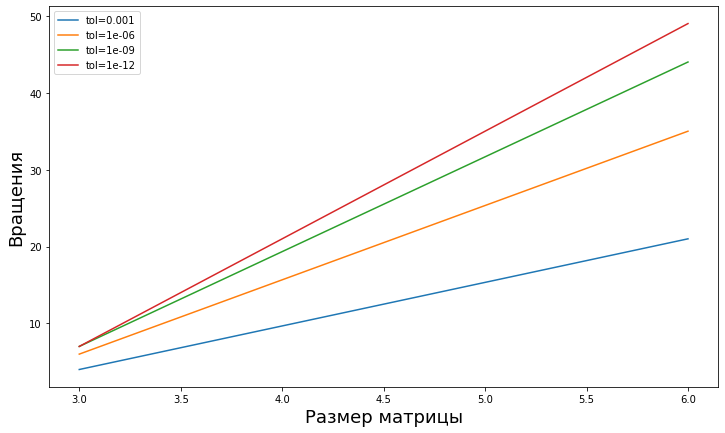

In [ ]:
print_res_hilb(data, "Вращения")
#print_res_hilb(data, "Итерации")

#Тесты матрицы Лемера

In [ ]:
def test_lehmer(tol):
    global N, counter, diap
    x = []
    c = []
    for n in diap:
        A = generate_lehmer_matrix(n)
        a, iter = jacobi_modern(A, tol)
        c.append(counter)
        x.append(iter)
    return x, c


def print_res_lehmer(data, y_label="Вращения"):
    global diap, toler
    plt.figure(figsize=(12,7))
    flag = y_label != "Вращения"
    for i in range(len(toler)):
        plt.plot(list(diap), data[i][flag], label="tol=" + str(10**(-toler[i])))
    plt.xlabel("Размер матрицы", fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.legend()
    plt.show()

In [ ]:
N = 16
diap = range(3, N, 3)
data = []

for tol in toler:
    print(f"For tolerance {10** (-tol)}")
    counter = 0
    data.append((test_lehmer(tol)))

For tolerance 0.001
Jacobi method converges with 3 iterations with 3.0 matrix range
Jacobi method converges with 28 iterations with 15.0 matrix range


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Jacobi method converges with 76 iterations with 36.0 matrix range
Jacobi method converges with 123 iterations with 66.0 matrix range
Jacobi method converges with 188 iterations with 105.0 matrix range
For tolerance 1e-06
Jacobi method converges with 5 iterations with 3.0 matrix range
Jacobi method converges with 41 iterations with 15.0 matrix range
Jacobi method converges with 104 iterations with 36.0 matrix range
Jacobi method converges with 188 iterations with 66.0 matrix range
Jacobi method converges with 297 iterations with 105.0 matrix range
For tolerance 1e-09
Jacobi method converges with 6 iterations with 3.0 matrix range
Jacobi method converges with 48 iterations with 15.0 matrix range
Jacobi method converges with 119 iterations with 36.0 matrix range
Jacobi method converges with 218 iterations with 66.0 matrix range
Jacobi method converges with 356 iterations with 105.0 matrix range
For tolerance 1e-12
Jacobi method converges with 6 iterations with 3.0 matrix range
Jacobi meth

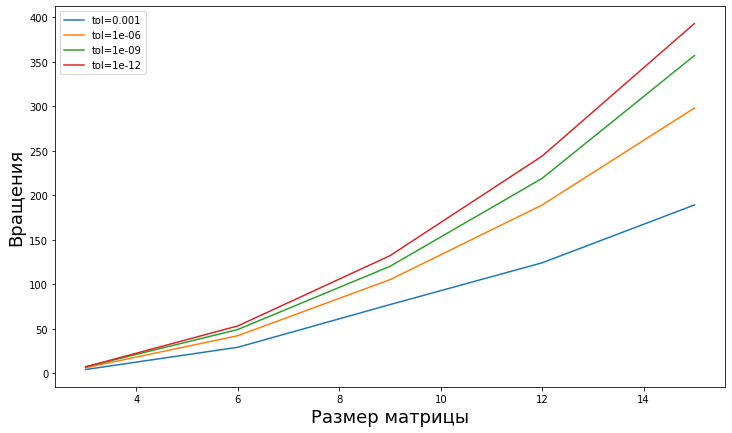

In [ ]:
print_res_lehmer(data, "Вращения")
#print_res_lehmer(data, "Итерации")

#Тесты с Condition

In [ ]:
def test_cond(tol, k):
    global N, counter, diap
    x = []
    c = []
    for n in diap:
        A = generate_diagonal_domination_matrix(n, k)
        print(np.linalg.cond(A.toarray()))
        a, iter = jacobi_modern(A, tol)
        c.append(counter)
        x.append(iter)
    return x, c


def print_res_cond(data, y_label="Вращения"):
    global diap, k_param
    plt.figure(figsize=(12,7))
    flag = y_label != "Вращения"
    for i in range(len(k_param)):
        plt.plot(list(diap), data[i][flag], label="k=" + str(k_param[i]))
    plt.xlabel("Размер матрицы", fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.legend()
    plt.show()

In [ ]:
N = 30
diap = range(3, N, 3)
data = []
k_param = [0, 3, 6, 9, 12]

for k in k_param:
    counter = 0
    data.append((test_cond(3, k)))

10.464101615137755
Jacobi method converges with 4 iterations with 3.0 matrix range
20.816651743904572
Jacobi method converges with 30 iterations with 15.0 matrix range
29.654205440916982
Jacobi method converges with 74 iterations with 36.0 matrix range
39.32479222666583
Jacobi method converges with 159 iterations with 66.0 matrix range
42.9569886326458
Jacobi method converges with 248 iterations with 105.0 matrix range
44.552191186489466
Jacobi method converges with 369 iterations with 153.0 matrix range
54.64792606621761
Jacobi method converges with 500 iterations with 210.0 matrix range
66.55558644757566
Jacobi method converges with 655 iterations with 276.0 matrix range
73.29849979855668
Jacobi method converges with 831 iterations with 351.0 matrix range
10000.999999986689
Jacobi method converges with 0 iterations with 3.0 matrix range
16748.810127643614
Jacobi method converges with 31 iterations with 15.0 matrix range
27647.277273792235
Jacobi method converges with 78 iterations wi

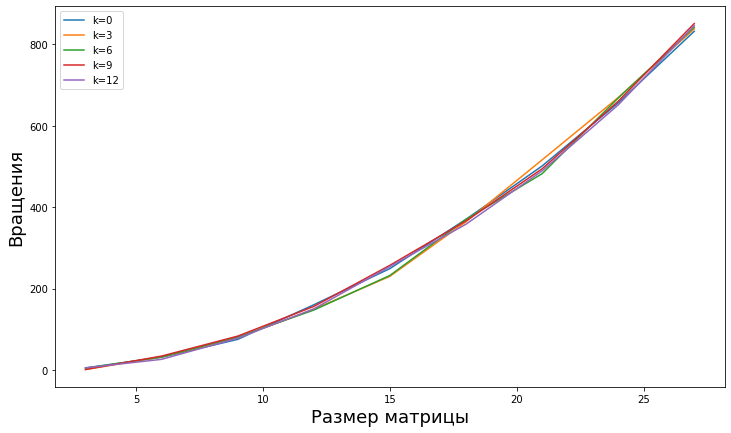

In [ ]:
print_res_cond(data, "Вращения")
#print_res_cond(data, "Итерации")

TODO:
Подумать над задачей обклеивания; над задачей шарика на плоскости из 3-х точек